In [1]:
#This is for Know the satellites position with a specific time and date 

In [2]:
#Now I need to know the near 
import os, sys, time, datetime, re, gpstk
from ftplib import FTP
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import math
import geocoder #to get the elevation in a lon-lat point

%matplotlib inline
%run -i pys/utils.py

In [3]:
Sat_Time = "21:20:23"
Sat_Date = "12/03/2017"
#Universidad Industrial de Santander
Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027


In [4]:
#Parse String to Date
import datetime

time_sat = datetime.datetime.strptime(Sat_Time,'%H:%M:%S')
date_sat = datetime.datetime.strptime(Sat_Date,'%d/%m/%Y')

InputDate = datetime.datetime.combine(datetime.date(date_sat.year, date_sat.month, date_sat.day), datetime.time(time_sat.hour, time_sat.minute,time_sat.second))
day_of_year = InputDate.timetuple().tm_yday
print InputDate

2017-03-12 21:20:23


In [5]:
UNAVCO_list = pd.read_csv("UNAVCOlist.csv")
UNAVCO_list.columns

Index([u'Unnamed: 0', u'CODE', u'Longitude', u'Latitude'], dtype='object')

search the nearest station

In [6]:
d = compute_distance(UNAVCO_list,Longitude_inGround,Latitude_inGround)
UNAVCO_list['Distance'] = d

In [7]:
UNAVCO_list.sort_values(['Distance'], ascending=[True], inplace=True)
UNAVCO_list

,Unnamed: 0,CODE,Longitude,Latitude,Distance
2632,2632,BUCM,-73.181700,7.116900,6977.043272
2673,2673,BUCM,-73.181700,7.116900,6977.043272
2901,2901,BUCM,-73.181700,7.116900,6977.043272
2690,2690,FLOR,-73.088600,7.041600,11435.389590
2668,2668,ARAT,-73.052200,6.703200,49053.488836
3048,3048,PLON,-72.649000,7.384000,58911.122695
25086,25086,MECE,-73.712000,7.107200,65144.656963
2728,2728,SOCO,-73.241700,6.462500,76345.500651
2871,2871,ABRE,-73.225900,8.086800,106027.388816
24149,24149,CUC1,-72.512800,7.932300,110911.258013


In [8]:
#search the nearest land stage
IDmin = UNAVCO_list.Distance.argmin()
S_Code = UNAVCO_list.CODE[IDmin]
S_Dist = UNAVCO_list.Distance[IDmin]
print S_Code,UNAVCO_list.Longitude[IDmin],UNAVCO_list.Latitude[IDmin],S_Dist

BUCM -73.1817 7.1169 6977.04327191


Now I have the Name of the Lan Station that I need.


In [9]:
UNAVCO_FTP = 'data-out.unavco.org'
NASA_FTP = 'cddis.gsfc.nasa.gov'

try:
    f = FTP(NASA_FTP)
    #f = FTP(UNAVCO_FTP)
    print f
    
except:
    pass
#print "Welcome:", f.getwelcome()
f.login()

#Now I wnat to look the folder that I need.
UNAVCO_FTP_path = '/pub/rinex/nav/' + str(InputDate.year) + '/' + str(day_of_year).zfill(3)
FTP_path ='/pub/gps/data/daily/'+ str(InputDate.year) + '/' + str(day_of_year).zfill(3) + '/' + str(InputDate.year)[2:] + 'n'

#[data-out.unavco.org] --> /pub/rinex/nav/2017/002
#[cddis.gsfc.nasa.gov] --> /pub/gps/data/daily/2017/001/17n --> 
#    FTP_path ='/pub/gps/data/daily/'+ str_year + '/' + str(day_of_year).zfill(3) + '/' + str_year[2:] + 'n'

print "Folder Needed:", f.cwd(FTP_path)
print "Current working directory:", f.pwd()

<ftplib.FTP instance at 0xac94feac>
Folder Needed: 250 Directory successfully changed.
Current working directory: /pub/gps/data/daily/2017/071/17n


In [ ]:
import os, sys
from ftplib import FTP 


LineData = 0
while (1):
    try:
        if(LineData>70):
            break
        IDmin = UNAVCO_list.Distance.argmin()
        NameStation = UNAVCO_list.CODE[IDmin]
        LineData += 1
        NameFile = NameStation.lower() + str(day_of_year).zfill(3) + '0.' + str(InputDate.year)[2:] + 'n.Z' 
        #For Now just GPS constallartion, I mean, .n file.'
        clear_output(wait=True)
        print("Try with station: %s" % (NameFile),"to " + str(float_formatter(UNAVCO_list.Distance[IDmin]/1000)) + " [Km]")
        print
        
        f.voidcmd("TYPE I")
        datasock, size = f.ntransfercmd("RETR "+ NameFile)
        bytes_so_far = 0
        fd = open(NameFile, 'wb')
        
        while 1:
            buf = datasock.recv(2048) 
            
            fd.write(buf)
            bytes_so_far += len(buf)
            clear_output(wait=True)
            print "Received",bytes_so_far, "of %d total bytes (%.1f%%)" % (size, 100 * bytes_so_far / float(size)),"bytes"
            sys.stdout.flush()
            if not buf:
                break
                 
            #if bytes_so_far == len(buf):
                #print 
                #break
        print("File %s" % (NameFile),"to " + str(float_formatter(UNAVCO_list.Distance[IDmin]/1000)) + " [Km]")
        fd.close()
        datasock.close()
        f.voidresp
        f.close()
        break
    except:
        UNAVCO_list = UNAVCO_list[UNAVCO_list.CODE != NameStation]

In [ ]:
#Note: If can't find a file, alert, or if the day is before or equal to today.

In [ ]:
NameFile

In [ ]:
gunzip_some_file(NameFile,'navRINEX',0)

In [ ]:
#!head -29 $navRINEX

Info about coordinate system [here](https://stereo-ssc.nascom.nasa.gov/coordinates_explanation.shtml)

In [10]:
import datetime
PRN = 23
#import ephem

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
# setup ephemeris store to look for satellite positions
bcestore = gpstk.GPSEphemerisStore()
contador = 1
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    bcestore.addEphemeris(ephem)
    if contador == 1:
        print "PRN: ",ephem.satID
        globalEphem = ephem
        POS = future_position(ephem,280850,1937)
        print "GPS time:", ephem.HOWtime
        print 
        contador += 1 
bcestore.SearchNear()
navData.close()

PRN:  GPS 1
GPS time: 604230



In [11]:
Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
print "Azimuth: ",AZ," Elevation: ",EL

Azimuth:  252.170708552  Elevation:  77.8946620538


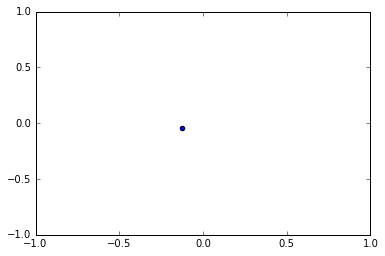

In [12]:
x,y = to_skyplot(EL,AZ)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.scatter(x,y)

In [13]:
import datetime
#PRN = All

Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
WeekSec = UTC2GPS(datetime.datetime.now()) #second of week
print WeekSec
list_PRN = []
AZIMUTH = []
ELEVATION = []

AZIMUTH2 = []
ELEVATION2 = []
Times = []
Diffs = []
Now = []
ownPRN = np.arange(0,32)
prueba = 1

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
bcestore = gpstk.GPSEphemerisStore()
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    #bcestore.addEphemeris(ephem)
    
    if ephem.HOWtime <= WeekSec: # and math.fabs(WeekSec-ephem.HOWtime) <= 21600.:  #21600 is 6 hours in seconds
        #print "SAT: ",ephem.satID," Time: ",ephem.HOWtime, " Diff: ", math.fabs(WeekSec-ephem.HOWtime)
        list_PRN.append(str(ephem.satID))
        Times.append(ephem.HOWtime)
        Diffs.append(math.fabs(WeekSec-ephem.HOWtime))
        
        POS = future_position(ephem,WeekSec,1937)
        AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
        AZIMUTH.append(AZ)
        ELEVATION.append(EL)
        
        Now = future_position(ephem,0,1937)
        AZ2,EL2 = ECEFtoAzElev(Now,Longitude_inGround,Latitude_inGround)
        AZIMUTH2.append(AZ2)
        ELEVATION2.append(EL2)
        
        if prueba == 1:
            print ephem.satID
            prueba += 1
        
RES = pd.DataFrame({"SATID":list_PRN ,"Time": Times, "Diff":Diffs,"EL": ELEVATION,"AZ": AZIMUTH,
                    "EL_now": ELEVATION2,"AZ_now": AZIMUTH2,})
        
bcestore.SearchNear()
navData.close()

146707
GPS 10


In [14]:
RES.head()

,AZ,AZ_now,Diff,EL,EL_now,SATID,Time
0,330.239945,330.239945,146707,54.727463,54.727463,GPS 10,0
1,74.349052,74.349052,146707,68.285069,68.285069,GPS 32,0
2,59.649277,59.649277,146707,84.953059,84.953059,GPS 27,0
3,39.821606,39.821606,146707,46.818827,46.818827,GPS 11,0
4,165.533678,165.533678,146707,68.147446,68.147446,GPS 8,0


In [15]:
seconds = UTC2GPS(datetime.datetime.now())
seconds, len(RES)

(147069, 205)

In [ ]:
#GPS2UTC(1937,seconds)
#datetime.datetime(2017, 2, 3, 15, 1, 16)

In [30]:
sx= []
sy = []
sx2 = []
sy2 = []
counterGPS = 0
counterNotGPS = 0
for k in range (0,len(RES)):
    if (RES.SATID[k] == 'GPS 2'):
        sx,sy = (to_skyplot(RES.EL,RES.AZ))
        sx2,sy2 = (to_skyplot(RES.EL,RES.AZ))
        counterGPS += 1
    else:
        counterNotGPS += 1

print len(sx),counterNotGPS,counterGPS


205 197 8


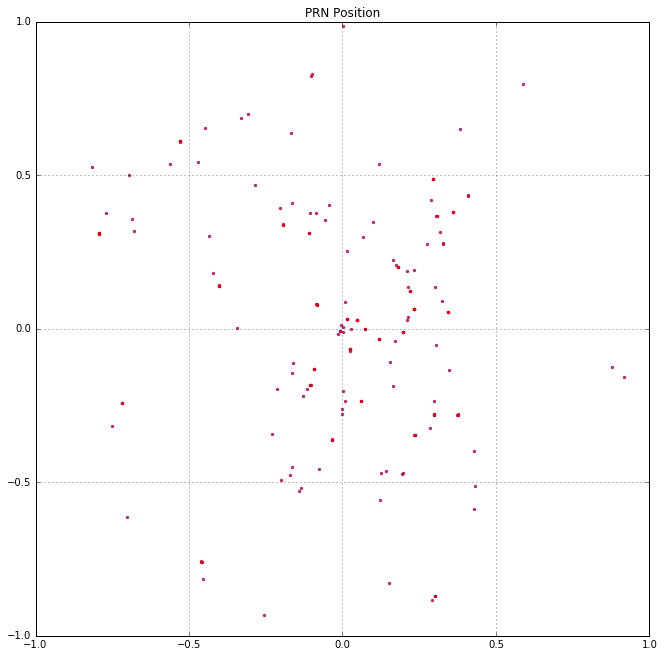

In [28]:
fig =plt.figure(figsize=(11,11))
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.scatter(sx,sy,s=5, alpha=0.5, color = 'blue')
plt.scatter(sx2,sy2,s=5, alpha=0.5, color = 'red')
plt.title('PRN Position')
plt.grid()

In [ ]:
import datetime
#PRN = All

Longitude_inGround = -73.1224429 
Latitude_inGround = 7.1388027
WeekSec = UTC2GPS(datetime.datetime.now()) #second of week
print WeekSec
list_PRN = []
AZIMUTH = []
ELEVATION = []
Times = []
Diffs = []
ownPRN = np.arange(0,32)
prueba = 1

navfile = 'navRINEX'
navHeader, navData = gpstk.readRinex3Nav(navfile)
bcestore = gpstk.GPSEphemerisStore()
 
for navDataObj in navData:
    ephem = navDataObj.toGPSEphemeris()
    #bcestore.addEphemeris(ephem)
    
    if 1 == 1: #ephem.HOWtime <= WeekSec: # and math.fabs(WeekSec-ephem.HOWtime) <= 21600.:  #21600 is 6 hours in seconds
        #print "SAT: ",ephem.satID," Time: ",ephem.HOWtime, " Diff: ", math.fabs(WeekSec-ephem.HOWtime)
        list_PRN.append(str(ephem.satID))
        Times.append(ephem.HOWtime)
        Diffs.append(math.fabs(WeekSec-ephem.HOWtime))
        POS = future_position(ephem,WeekSec,1937)
        AZ,EL = ECEFtoAzElev(POS,Longitude_inGround,Latitude_inGround)
        AZIMUTH.append(AZ)
        ELEVATION.append(EL)
        if prueba == 1:
            print ephem.satID
            prueba += 1
        
RES = pd.DataFrame({"SATID":list_PRN ,"Time": Times, "Diff":Diffs,"Elev": ELEVATION,"Azimuth": AZIMUTH,})
        
bcestore.SearchNear()
navData.close()